# Setup Paths

In [ ]:
import os

In [ ]:
custom_model_name = 'my_ssd_mobnet'
pretrained_model_name = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
pretrained_model_url = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
tf_record_script_name = 'generate_tfrecord.py'
label_map_name = 'label_map.pbtxt'

In [ ]:
paths = {
    'workspace_path': os.path.join('object_detection', 'workspace'),
    'scripts_path': os.path.join('object_detection', 'scripts'),
    'apimodel_path': os.path.join('object_detection', 'models'),
    'annotation_path': os.path.join('object_detection', 'workspace', 'annotations'),
    'image_path': os.path.join('object_detection', 'workspace', 'images'),
    'model_path': os.path.join('object_detection', 'workspace', 'models'),
    'pretrained_model_path': os.path.join('object_detection', 'workspace', 'pre-trained-models'),
    'checkpoint_path': os.path.join('object_detection', 'workspace', 'models', custom_model_name),
    'output_path': os.path.join('object_detection', 'workspace', 'models', custom_model_name, 'export'),
    'tfjs_path': os.path.join('object_detection', 'workspace', 'models', custom_model_name, 'tfjsexport'),
    'tflite_path': os.path.join('object_detection', 'workspace', 'models', custom_model_name, 'tfliteexport'),
    'protoc_path': os.path.join('object_detection', 'protoc')
}

In [ ]:
files = {
    'pipeline_config': os.path.join('object_detection', 'workspace', 'models', custom_model_name, 'pipeline.config'),
    'tf_record_script': os.path.join(paths['scripts_path'], tf_record_script_name),
    'labelmap': os.path.join(paths['annotation_path'], label_map_name)
}

In [ ]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# Download and Install TF Pretrained Models

In [ ]:
if os.name == 'nt':
    !pip install wget
    import wget

In [ ]:
if not os.path.exists(os.path.join(paths['apimodel_path'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['apimodel_path']}

Cloning into 'object_detection/models'...
remote: Enumerating objects: 71920, done.
remote: Total 71920 (delta 0), reused 0 (delta 0), pack-reused 71920
Receiving objects: 100% (71920/71920), 578.92 MiB | 38.60 MiB/s, done.
Resolving deltas: 100% (50879/50879), done.


In [ ]:
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd object_detection/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['protoc_path']}
    !cd {paths['protoc_path']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['protoc_path'], 'bin'))   
    !cd object_detection/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd object_detection/models/research/slim && pip install -e . 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Processing /content/object_detection/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.1 MB 8.0 MB/s 
     |████████████████████████████████| 352 kB 69.8 MB/s 
     |████████████████████████████████| 2.2 MB 51.1 MB/s 
     |████████████████████████████████| 23.4 MB 1.4 MB/s 
     |████████████████████████████████| 47.8 MB 49 kB/s 
     |████████████████████████████

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['apimodel_path'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-04-17 01:10:22.038789: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0417 01:10:22.281579 140329488418688 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 2.9s
I0417 01:10:22.643326 140329488418688 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 2.9s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.49s
I0417 01:10:23.133198 140329488418688 test_u

In [ ]:
import object_detection

In [ ]:
if os.name =='posix':
    !wget {pretrained_model_url}
    !mv {pretrained_model_name+'.tar.gz'} {paths['pretrained_model_path']}
    !cd {paths['pretrained_model_path']} && tar -zxvf {pretrained_model_name+'.tar.gz'}
if os.name == 'nt':
    wget.download(pretrained_model_url)
    !move {pretrained_model_name+'.tar.gz'} {paths['pretrained_model_path']}
    !cd {paths['pretrained_model_path']} && tar -zxvf {pretrained_model_name+'.tar.gz'}

--2022-04-17 01:10:55--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.13.128, 2607:f8b0:400c:c13::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.13.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.09s   

2022-04-17 01:10:55 (209 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8

# Create Label Map

In [ ]:
labels = [{'name':'mask', 'id':1}, {'name':'no_mask', 'id':2}]

with open(files['labelmap'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# Create TF Records

In [ ]:
ARCHIVE_FILES = os.path.join(paths['image_path'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

object_detection/workspace/images/train/
object_detection/workspace/images/train/face_mask_048defa9-bb5f-11ec-8b0f-bca8a6723a43.jpg
object_detection/workspace/images/train/face_mask_048defa9-bb5f-11ec-8b0f-bca8a6723a43.xml
object_detection/workspace/images/train/face_mask_0a8a9d4a-bb5f-11ec-870c-bca8a6723a43.jpg
object_detection/workspace/images/train/face_mask_0a8a9d4a-bb5f-11ec-870c-bca8a6723a43.xml
object_detection/workspace/images/train/face_mask_10862b27-bb5f-11ec-b548-bca8a6723a43.jpg
object_detection/workspace/images/train/face_mask_10862b27-bb5f-11ec-b548-bca8a6723a43.xml
object_detection/workspace/images/train/face_mask_168008f8-bb5f-11ec-a87e-bca8a6723a43.jpg
object_detection/workspace/images/train/face_mask_168008f8-bb5f-11ec-a87e-bca8a6723a43.xml
object_detection/workspace/images/train/face_mask_1c7ab6a9-bb5f-11ec-8a62-bca8a6723a43.jpg
object_detection/workspace/images/train/face_mask_1c7ab6a9-bb5f-11ec-8a62-bca8a6723a43.xml
object_detection/workspace/images/train/face_mask

In [ ]:
if not os.path.exists(files['tf_record_script']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['scripts_path']}

Cloning into 'object_detection/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
!python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'train')} -l {files['labelmap']} -o {os.path.join(paths['annotation_path'], 'train.record')} 

Successfully created the TFRecord file: object_detection/workspace/annotations/train.record


In [ ]:
!python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'test')} -l {files['labelmap']} -o {os.path.join(paths['annotation_path'], 'test.record')} 

Successfully created the TFRecord file: object_detection/workspace/annotations/test.record


# Copy Model Config to Training Folder

In [ ]:
if os.name =='posix':
    !cp {os.path.join(paths['pretrained_model_path'], pretrained_model_name, 'pipeline.config')} {os.path.join(paths['checkpoint_path'])}
if os.name == 'nt':
    !copy {os.path.join(paths['pretrained_model_path'], pretrained_model_name, 'pipeline.config')} {os.path.join(paths['checkpoint_path'])}

# Update Config for Transfer Learning

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
config = config_util.get_configs_from_pipeline_file(files['pipeline_config'])

In [ ]:
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 },
 'eval_input_configs': [label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 }
 ],
 'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.9969999790191

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['pipeline_config'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [ ]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['pretrained_model_path'], pretrained_model_name, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['labelmap']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['annotation_path'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['labelmap']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['annotation_path'], 'test.record')]

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['pipeline_config'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# Train Model

In [ ]:
training_script = os.path.join(paths['apimodel_path'], 'research', 'object_detection', 'model_main_tf2.py')

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(training_script, paths['checkpoint_path'],files['pipeline_config'])

In [ ]:
print(command)

python object_detection/models/research/object_detection/model_main_tf2.py --model_dir=object_detection/workspace/models/my_ssd_mobnet --pipeline_config_path=object_detection/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=2000


In [ ]:
!pip uninstall opencv-python-headless==4.5.5.62
!pip install opencv-python-headless==4.5.2.52

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [ ]:
!{command}

2022-04-17 01:12:41.591415: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0417 01:12:41.598506 140163770820480 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 2000
I0417 01:12:41.608141 140163770820480 config_util.py:552] Maybe overwriting train_steps: 2000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0417 01:12:41.608354 140163770820480 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0417 01:12:41.817794 140163770820480 deprecation.py:343] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experiment

# Evaluate Model

In [ ]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(training_script, paths['checkpoint_path'],files['pipeline_config'], paths['checkpoint_path'])

In [ ]:
print(command)

python object_detection/models/research/object_detection/model_main_tf2.py --model_dir=object_detection/workspace/models/my_ssd_mobnet --pipeline_config_path=object_detection/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=object_detection/workspace/models/my_ssd_mobnet


In [ ]:
!{command}

W0414 21:24:09.691791 140399124526976 model_lib_v2.py:1090] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0414 21:24:09.692036 140399124526976 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0414 21:24:09.692195 140399124526976 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0414 21:24:09.692338 140399124526976 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0414 21:24:09.692537 140399124526976 model_lib_v2.py:1111] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2022-04-14 21:24:10.253456: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original confi

# Load from Checkpoint

In [ ]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['pipeline_config'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['checkpoint_path'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Detect from Image

In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(files['labelmap'])

In [ ]:
IMAGE_PATH = os.path.join(paths['image_path'], 'test', 'face_mask_f897f659-bb5e-11ec-b9a8-bca8a6723a43.jpg')

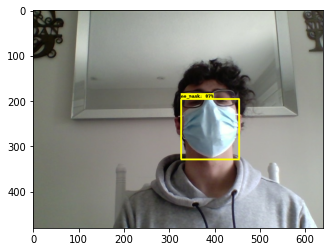

In [ ]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Zip and Export

In [ ]:
!tar -czf models.tar.gz {paths['checkpoint_path']}